In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize']=(20,12)
%matplotlib inline



In [4]:
BASE_DIR='/prj/ALANIS/UM_Modelling/EMISSIONS/a_JASMIN/WFD_EI_global/'

JRM_DIR=BASE_DIR+'JOEY/'
ECP_DIR=BASE_DIR+'ECP_gridded/'


In [48]:
# Read Joey Data

# ancil:
inf=nc.Dataset(JRM_DIR+'julesb.nc','r')
#print(inf.variables['tim'][:])
jrm_wetl=inf.variables['wetl'][84:96,::-1]
jrm_cs=inf.variables['carb'][84:96,:,::-1]
jrm_t_soil=inf.variables['temp'][84:96,::-1]


inf.close()

#ch4
inf=nc.Dataset(JRM_DIR+'jules.nc','r')
jrm_ch4=inf.variables['scaled'][84:96,:]
inf.close()




In [49]:
#print(jrm_ch4.shape)
#print(jrm_cs.shape)
#print(jrm_wetl.shape)
#print(jrm_t_soil.shape)

jrm_wetl_new=jrm_wetl.copy()
jrm_wetl_new[:,:,:360]=jrm_wetl[:,:,360:]
jrm_wetl_new[:,:,360:]=jrm_wetl[:,:,:360]
jrm_wetl=jrm_wetl_new

jrm_cs_new=jrm_cs.copy()
jrm_cs_new[:,:,:,:360]=jrm_cs[:,:,:,360:]
jrm_cs_new[:,:,:,360:]=jrm_cs[:,:,:,:360]
jrm_cs=jrm_cs_new

jrm_t_soil_new=jrm_t_soil.copy()
jrm_t_soil_new[:,:,:360]=jrm_t_soil[:,:,360:]
jrm_t_soil_new[:,:,360:]=jrm_t_soil[:,:,:360]
jrm_t_soil=jrm_t_soil_new



In [87]:
# Read ECP data for 2000

#ancil
inf=nc.Dataset(ECP_DIR+'Jv4.5_WFDEI_nti_TRIFFID_gridded_monthly_cs.2000.nc','r')
ECP_cs=inf.variables['cs'][:]
ECP_t_soil_top= inf.variables['t_soil'][:,0,:]
ECP_t_soil= (inf.variables['t_soil'][:,0,:]*0.1) + \
            (inf.variables['t_soil'][:,1,:]*0.25) + \
            (inf.variables['t_soil'][:,2,:]*0.65) 
            
ECP_resp_s=inf.variables['resp_s'][:]
inf.close()

# ch4 and wetl
inf=nc.Dataset(ECP_DIR+'Jv4.5_WFDEI_nti_TRIFFID_gridded_monthly_ch4.2000.nc','r')
ECP_ch4=inf.variables['fch4_wetl'][:]
ECP_wetl=inf.variables['fwetl'][:]
inf.close()


In [51]:
print(ECP_ch4.shape)
print(ECP_cs.shape)
print(ECP_wetl.shape)
print(ECP_t_soil.shape)

(12, 360, 720)
(12, 4, 360, 720)
(12, 360, 720)
(12, 360, 720)


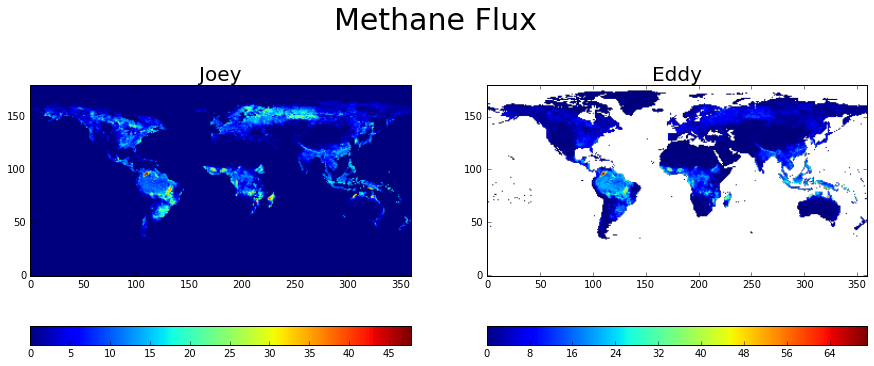

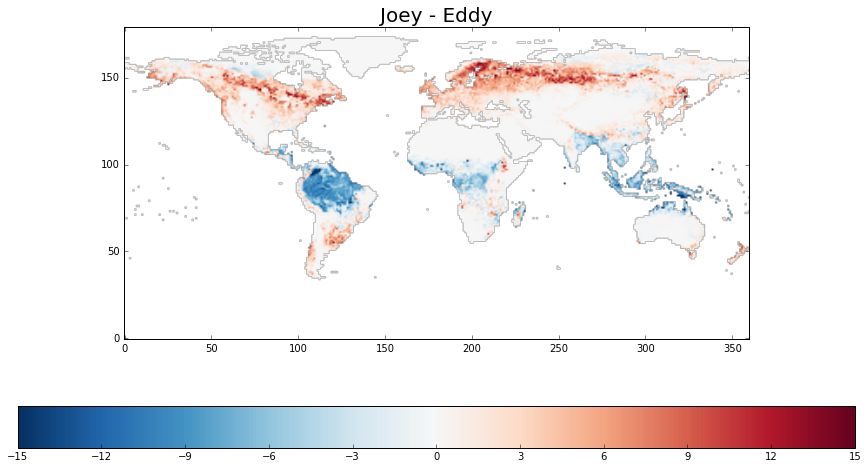

In [88]:
j_data=jrm_ch4.max(axis=0)*1e4*86400*(16.04/6.022e23)*1e3
                          # m2 * day * (molarmass/ Na) * mg
e_data=ECP_ch4.max(axis=0)[::2,::2]
name='Methane Flux'


fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(15,6))
plt.sca(axes[0])
plt.imshow(j_data,origin='bottom')
plt.colorbar(orientation='horizontal')
axes[0].set_title('Joey',fontsize=20)
plt.sca(axes[1])
plt.imshow(e_data,origin='bottom')
plt.colorbar(orientation='horizontal')
axes[1].set_title('Eddy',fontsize=20)
fig.suptitle(name,fontsize=30)
plt.show()

fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(15,8))
plt.sca(axes)
plt.imshow(j_data-e_data,origin='bottom',cmap='RdBu_r',vmin=-15,vmax=15)
plt.colorbar(orientation='horizontal')
axes.set_title('Joey - Eddy',fontsize=20)
plt.show()


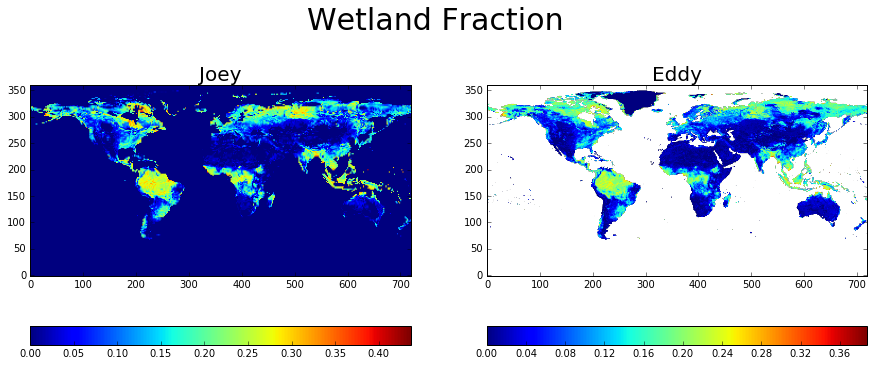

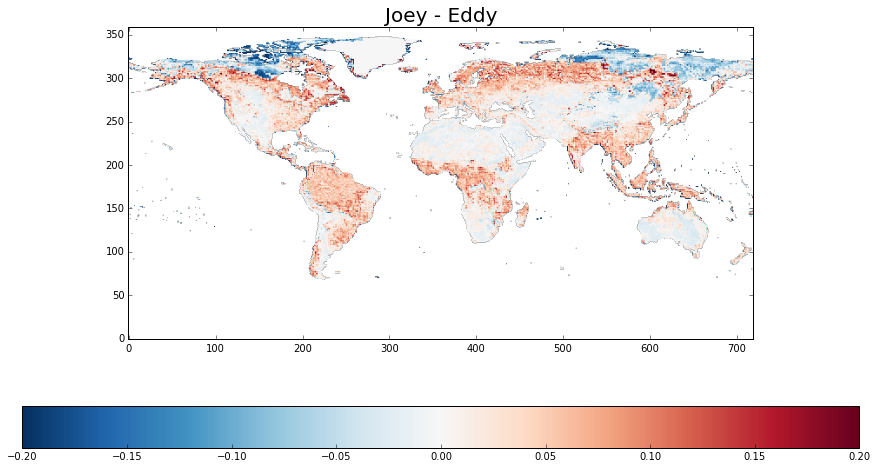

In [89]:
j_data=jrm_wetl_new.max(axis=0)
e_data=ECP_wetl.max(axis=0)
name='Wetland Fraction'

fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(15,6))
plt.sca(axes[0])
plt.imshow(j_data,origin='bottom')
plt.colorbar(orientation='horizontal')
axes[0].set_title('Joey',fontsize=20)
plt.sca(axes[1])
plt.imshow(e_data,origin='bottom')
plt.colorbar(orientation='horizontal')
axes[1].set_title('Eddy',fontsize=20)
fig.suptitle(name,fontsize=30)
plt.show()

fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(15,8))
plt.sca(axes)
plt.imshow(j_data-e_data,origin='bottom',cmap='RdBu_r',vmin=-0.2,vmax=0.2)
plt.colorbar(orientation='horizontal')
axes.set_title('Joey - Eddy',fontsize=20)
plt.show()

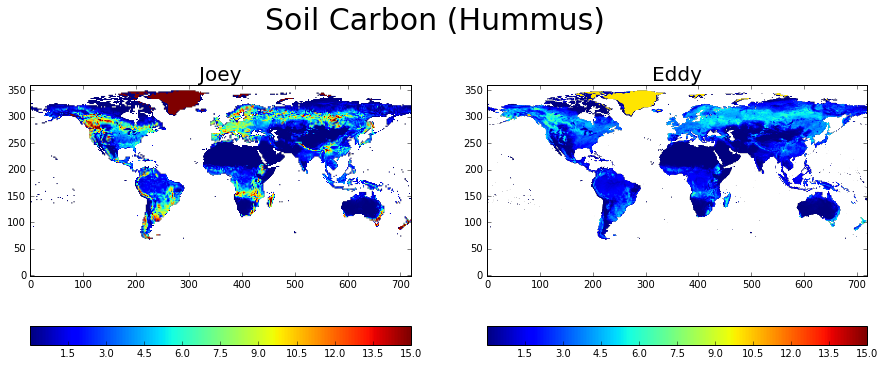

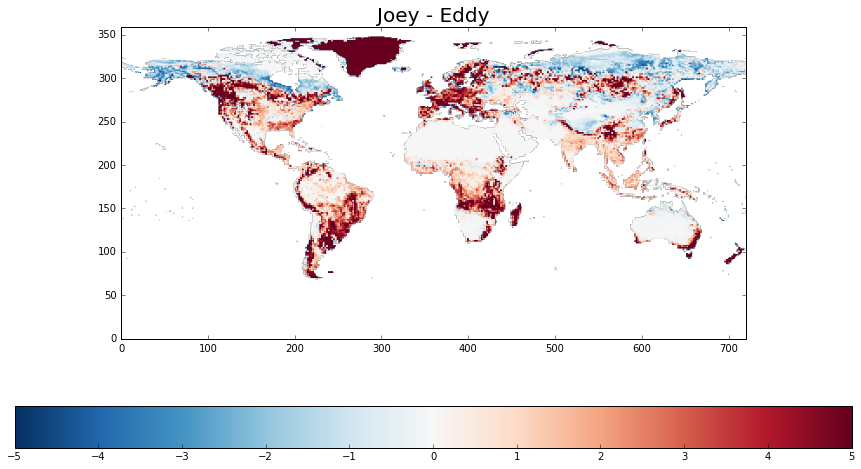

In [90]:
j_data=jrm_cs_new[:,3,:,:].max(axis=0)
e_data=ECP_cs[:,3,:,:].max(axis=0)
name='Soil Carbon (Hummus)'


fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(15,6))
plt.sca(axes[0])
plt.imshow(j_data,origin='bottom',vmax=15)
plt.colorbar(orientation='horizontal')
axes[0].set_title('Joey',fontsize=20)
plt.sca(axes[1])
plt.imshow(e_data,origin='bottom',vmax=15)
plt.colorbar(orientation='horizontal')
axes[1].set_title('Eddy',fontsize=20)
fig.suptitle(name,fontsize=30)
plt.show()

fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(15,8))
plt.sca(axes)
plt.imshow(j_data-e_data,origin='bottom',cmap='RdBu_r',vmin=-5,vmax=5)
plt.colorbar(orientation='horizontal')
axes.set_title('Joey - Eddy',fontsize=20)
plt.show()

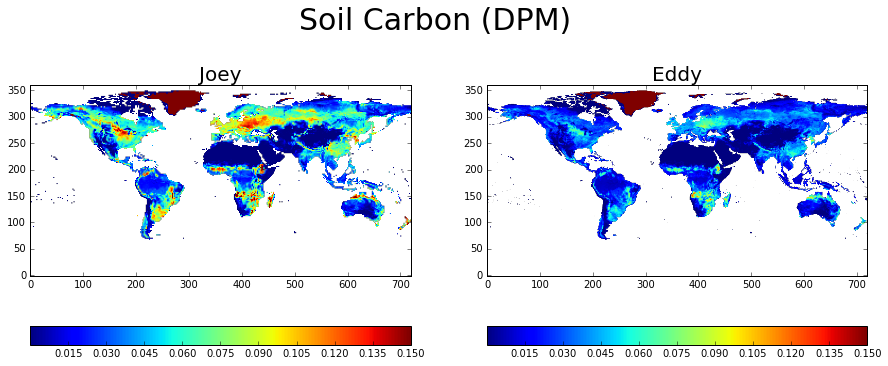

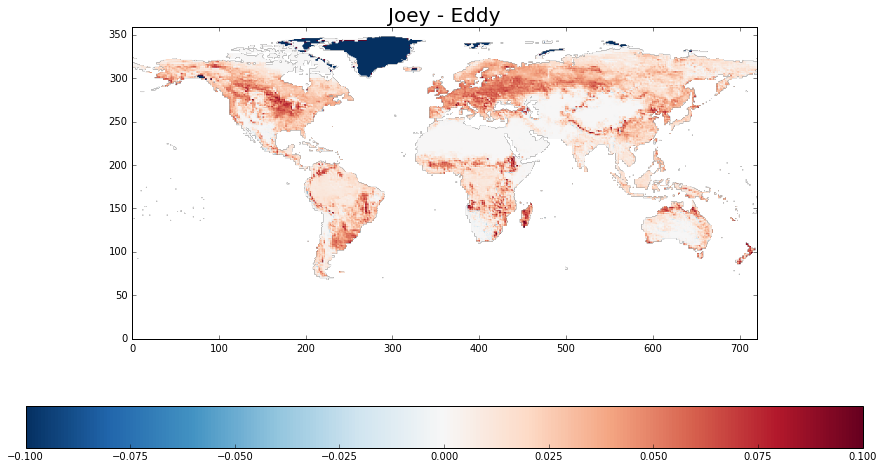

In [91]:
j_data=jrm_cs_new[:,0,:,:].max(axis=0)
e_data=ECP_cs[:,0,:,:].max(axis=0)
name='Soil Carbon (DPM)'


fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(15,6))
plt.sca(axes[0])
plt.imshow(j_data,origin='bottom',vmax=0.15)
plt.colorbar(orientation='horizontal')
axes[0].set_title('Joey',fontsize=20)
plt.sca(axes[1])
plt.imshow(e_data,origin='bottom',vmax=0.15)
plt.colorbar(orientation='horizontal')
axes[1].set_title('Eddy',fontsize=20)
fig.suptitle(name,fontsize=30)
plt.show()

fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(15,8))
plt.sca(axes)
plt.imshow(j_data-e_data,origin='bottom',cmap='RdBu_r',vmin=-0.1,vmax=0.1)
plt.colorbar(orientation='horizontal')
axes.set_title('Joey - Eddy',fontsize=20)
plt.show()



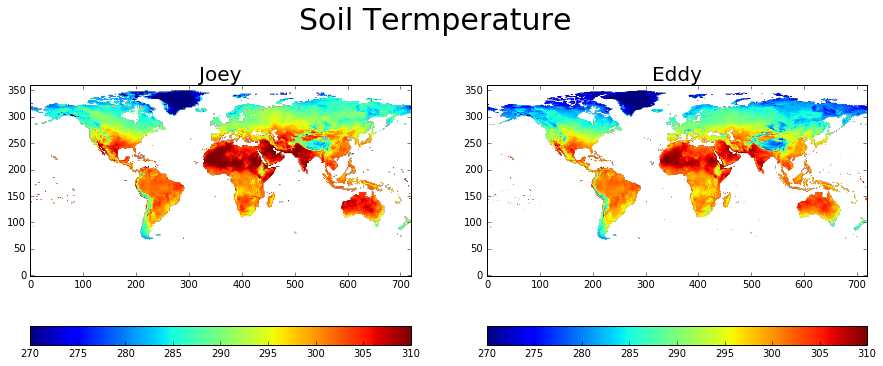

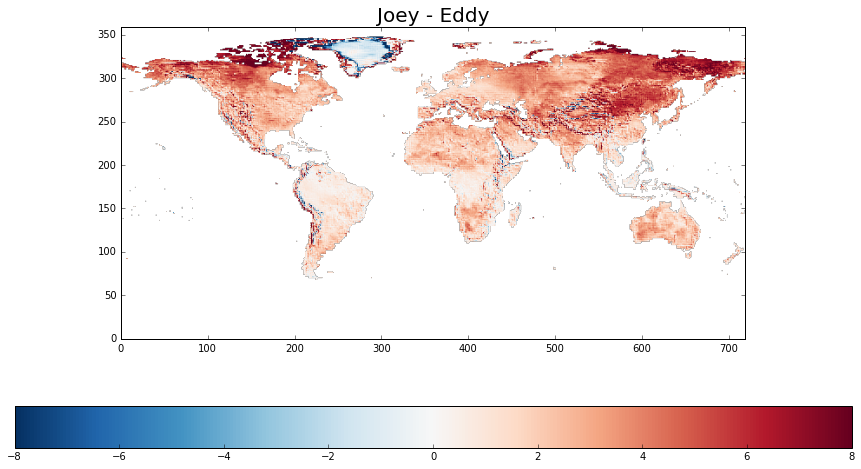

In [93]:
j_data=jrm_t_soil[:,:,:].max(axis=0)
e_data=ECP_t_soil[:,:,:].max(axis=0)
name='Soil Termperature'



fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(15,6))
plt.sca(axes[0])
plt.imshow(j_data,origin='bottom',vmin=270,vmax=310)
plt.colorbar(orientation='horizontal')
axes[0].set_title('Joey',fontsize=20)
plt.sca(axes[1])
plt.imshow(e_data,origin='bottom',vmin=270,vmax=310)
plt.colorbar(orientation='horizontal')
axes[1].set_title('Eddy',fontsize=20)
fig.suptitle(name,fontsize=30)
plt.show()

fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(15,8))
plt.sca(axes)
plt.imshow(j_data-e_data,origin='bottom',cmap='RdBu_r',vmin=-8,vmax=8)
plt.colorbar(orientation='horizontal')
axes.set_title('Joey - Eddy',fontsize=20)
plt.show()




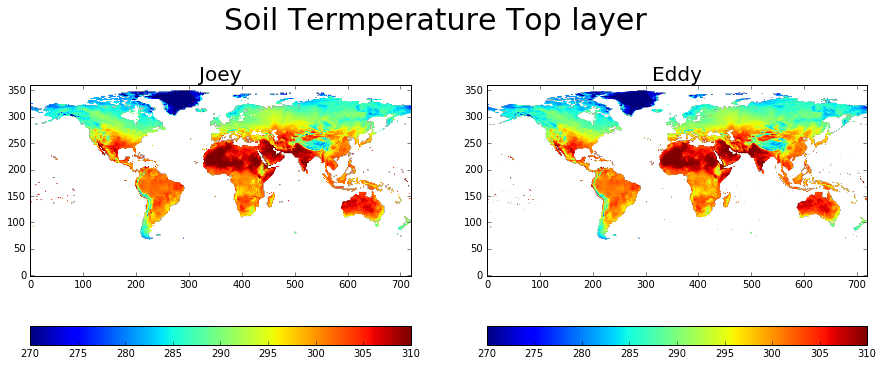

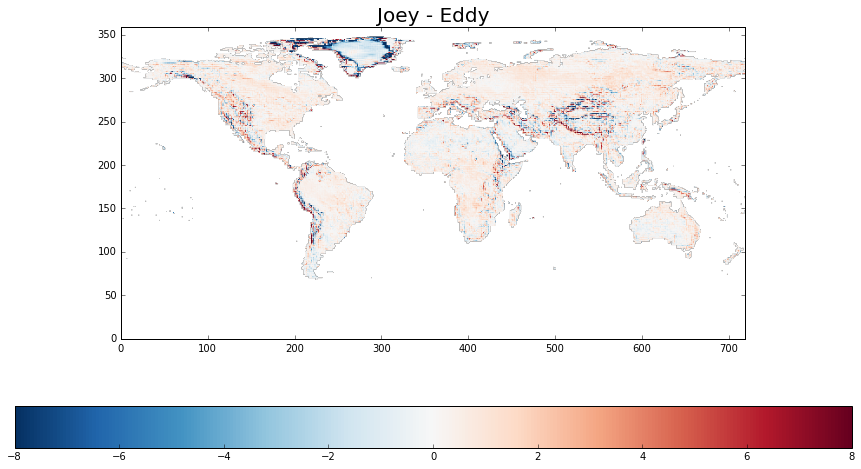

In [94]:
j_data=jrm_t_soil[:,:,:].max(axis=0)
e_data=ECP_t_soil_top[:,:,:].max(axis=0)
name='Soil Termperature Top layer'



fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(15,6))
plt.sca(axes[0])
plt.imshow(j_data,origin='bottom',vmin=270,vmax=310)
plt.colorbar(orientation='horizontal')
axes[0].set_title('Joey',fontsize=20)
plt.sca(axes[1])
plt.imshow(e_data,origin='bottom',vmin=270,vmax=310)
plt.colorbar(orientation='horizontal')
axes[1].set_title('Eddy',fontsize=20)
fig.suptitle(name,fontsize=30)
plt.show()

fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(15,8))
plt.sca(axes)
plt.imshow(j_data-e_data,origin='bottom',cmap='RdBu_r',vmin=-8,vmax=8)
plt.colorbar(orientation='horizontal')
axes.set_title('Joey - Eddy',fontsize=20)
plt.show()


